---

## Validation part using custom images

In [1]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 5.3 MB/s eta 0:00:00


In [4]:
# Setting framework environment
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [5]:
# import the necessary Library

import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import keras 
from sklearn.model_selection import train_test_split

Segmentation Models: using `tf.keras` framework.


In [6]:
keras.backend.set_image_data_format('channels_last')

In [135]:
model.save('model_final1.h5')

### Predicting score with mask

In [86]:
from skimage.io import imread
from skimage.transform import resize

# function to predict result 
def predict_image(img_path, mask_path, model):
    H = 480
    W = 480
    num_classes = 4

    img = imread(img_path)
    img = img[:480, :480, :]
    img = img / 255.0
    img = img.astype(np.float32)

    ## Read mask
    mask = imread(mask_path, as_gray = True)
    mask = mask[:480, :480]
    
    ## Prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    
    
    # calculating IOU score
    inter = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)
    
    iou = inter.sum() / union.sum()

    return img, mask, pred_mask, iou

1/1 [==============================] - 0s 25ms/step


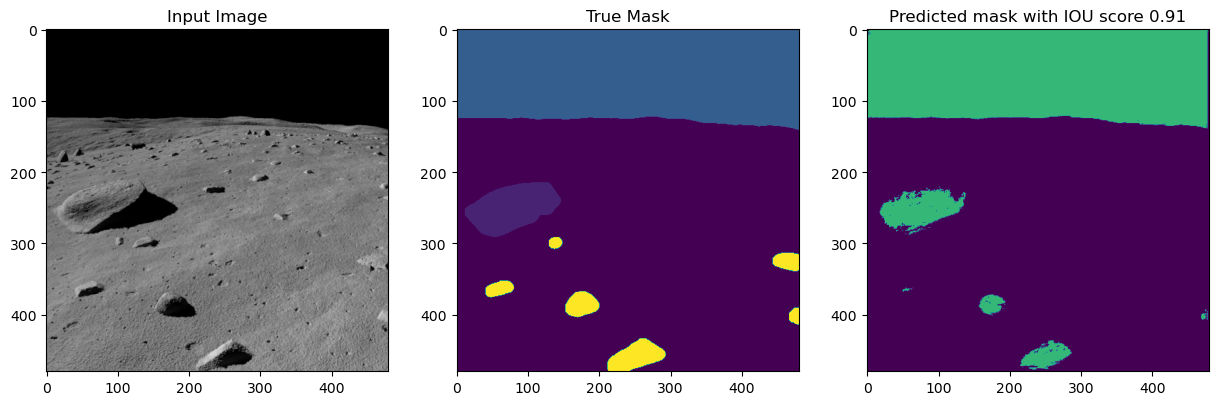

In [134]:
img_path = '../input/artificial-lunar-rocky-landscape-dataset/images/render/render4069.png'
mask_path = '../input/artificial-lunar-rocky-landscape-dataset/images/clean/clean4069.png'

img, mask, pred_mask, iou = predict_image(img_path, mask_path, model)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("True Mask")
ax2.imshow(mask)

ax3.set_title("Predicted mask with IOU score %.2f"%(iou))
ax3.imshow(pred_mask)

plt.savefig("output4069.png")

plt.show()


In [130]:
import random

numbers = []

for i in range(10):
    num = random.randint(1, 7812)
    numbers.append(num)

print(numbers)

[387, 4069, 570, 6419, 4244, 42, 526, 5217, 6002, 1570]


### Realtime model running code

In [137]:
from keras.models import load_model
from segmentation_models.metrics import iou_score

custom_objects = {'iou_score': iou_score}

model = load_model('/kaggle/input/model-mask-moon/model_final1.h5',custom_objects=custom_objects)

In [141]:
from skimage.io import imread
from skimage.transform import resize
import cv2 as cv

# function to predict result 
def predict_image(img_path, model):
    H = 480
    W = 480
    num_classes = 4

    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

    img = img[:, :, :3]
    img = img[:480, :480, :]
    img = img / 255.0
    img = img.astype(np.float32)
    
    ## Prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]
    

    return img,pred_mask

1/1 [==============================] - 0s 24ms/step


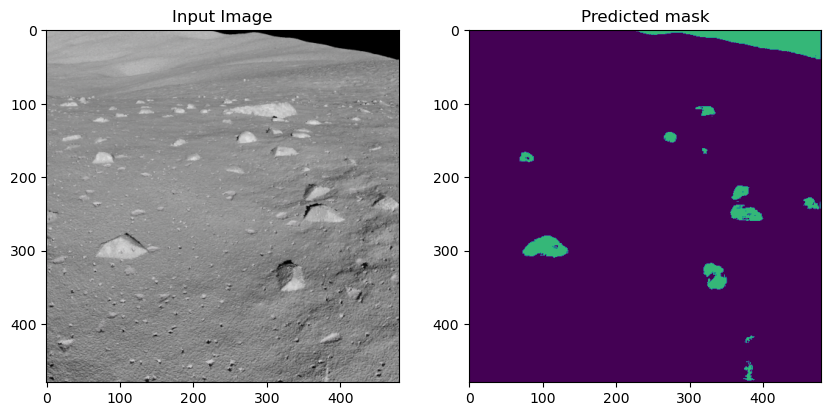

In [148]:
img_path = '/kaggle/input/artificial-lunar-rocky-landscape-dataset/images/render/render0005.png'

img, pred_mask = predict_image(img_path, model)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("Predicted mask")
ax2.imshow(pred_mask)

plt.savefig("outputPCAM17.png")

plt.show()
